In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import os
import glob
import math
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# matplotlib library load
import matplotlib.pyplot as plt

# plot 한글 보이게
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_excel(r'C:\Users\user\Desktop\Factor analysis WS\10년 코스피 200.xlsx', index_col=0)

In [6]:
# 열기준 결측치 제거
df = df.dropna(axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2013-11-13 to 2023-11-10
Columns: 158 entries, 삼성전자 to 한섬
dtypes: int64(158)
memory usage: 3.0 MB
None


In [7]:
from sklearn.preprocessing import StandardScaler
# 종가 데이터를 수익롤 데이터로 변환
data = np.log(df).diff(1).dropna()

# 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)

In [8]:
len(data.columns)

158

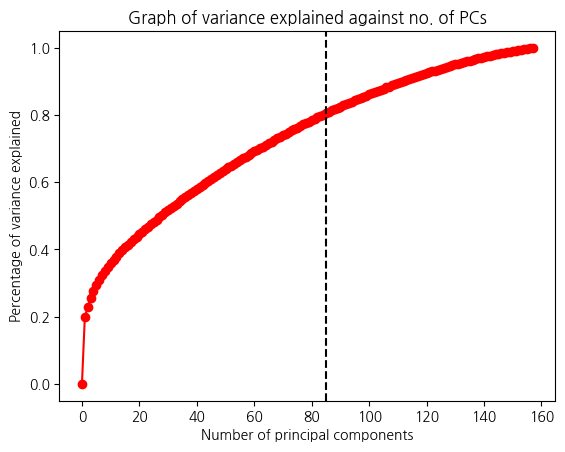

Total percentage variance explained with 85 principal components: 0.806


            PC1       PC2       PC3       PC4       PC5
0     -0.755037 -0.612376  0.779629  0.013458  1.806268
1     -7.769448  1.983395 -0.203891 -1.049656 -0.682522
2     -0.015218 -0.315036  0.030766 -0.291221  0.067526
3     -4.631947  1.229445  2.762950  0.549311  0.987967
4      2.168256 -1.387987  0.582245  0.455854 -1.209138
...         ...       ...       ...       ...       ...
2453 -23.182368 -3.145003 -5.620495 -2.655309 -0.551244
2454   8.701940 -1.257330  2.939305  2.816003 -0.037090
2455   1.840679 -2.291443  4.092498  1.798446  0.195165
2456  -2.121065  1.296684  2.483942 -0.921288  0.566038
2457   5.515155  3.508354  0.000113 -0.830499 -1.478694

[2458 rows x 5 columns]


In [9]:
def optimise_pca(norm):
    explained_var = []
    principal_components = []
    for i in range(0,len(norm.columns),1): # For loop from 0 to 49 principal components to calculate their respective percentage of variance.

        # Initialise the PCA function with the i number of principal components.
        pca_model = PCA(n_components=i) 
        
        # Fits the model with norm and applies PCA on norm to return dataset with i number of principal components
        pca_model.fit_transform(norm)

        # Using the attribute ".explained_variance_ratio" returns percentage of variance explained by each selected component.
        # This result is then summed up to obtained percentage of variance explained for i number of components.
        # It is appended into explained_var to be plotted as the y-axis.
        explained_var.append(sum(pca_model.explained_variance_ratio_)) 
        
        # The number of principal components, i, is appended to principal_components to be plotted as the x-axis.
        principal_components.append(i)

    # Plot graph of "Percentage of variance explained" against "Number of principal components"
    # Using this graph, the optimal number of dimensions can be found via the elbow method
    plt.plot(principal_components, explained_var, color="red", marker="o")
    plt.title("Graph of variance explained against no. of PCs")
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage of variance explained")
    plt.axvline(85, color='black', linestyle='--')
    plt.show()

def pca(norm, symbols, n):

    # Initialise the PCA function with the n number of principal components.
    pca_model = PCA(n_components=n)

    # Fits the model with norm and applies PCA on norm to return dataset with n number of principal components
    components = pca_model.fit_transform(norm)

    # print(f"{n} largest eigenvalues of the covariance matrix:\n{pca_model.explained_variance_}")
    # print(f"Percentage of variance explained by each component:\n{pca_model.explained_variance_ratio_}")
    print(f"Total percentage variance explained with {n} principal components: {round(sum(pca_model.explained_variance_ratio_),3)}\n")
    print()

    # Create dataset (that has been reduced to n number of principal components) in proper format using pd.Dataframe(data,columns,index): 
    pca_df = pd.DataFrame(components, columns=[f"PC{k}" for k in range(1,n+1)],index=symbols)
    return pca_df

norm_symbols = data.index
optimise_pca(data) 

pca_df = pca(data, norm_symbols, n=85)
print(pca_df.iloc[:,:5])

## PC1

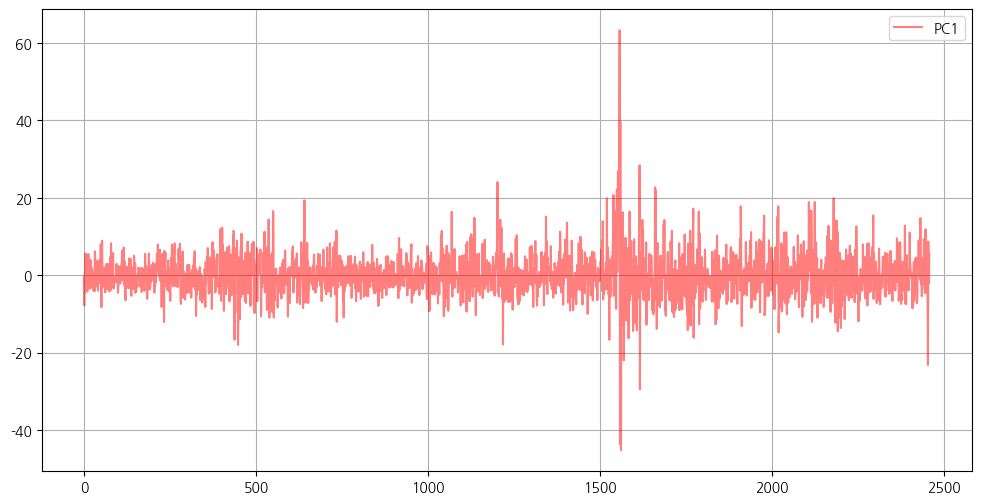

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(pca_df['PC1'], label='PC1', color='red', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

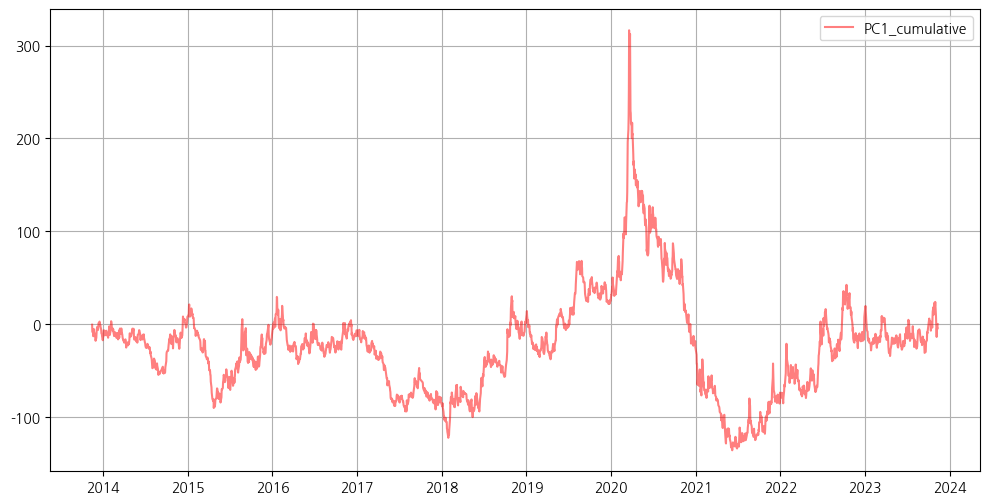

In [69]:
Cumulative_df = pca_df['PC1'].cumsum()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC1_cumulative', color='red', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

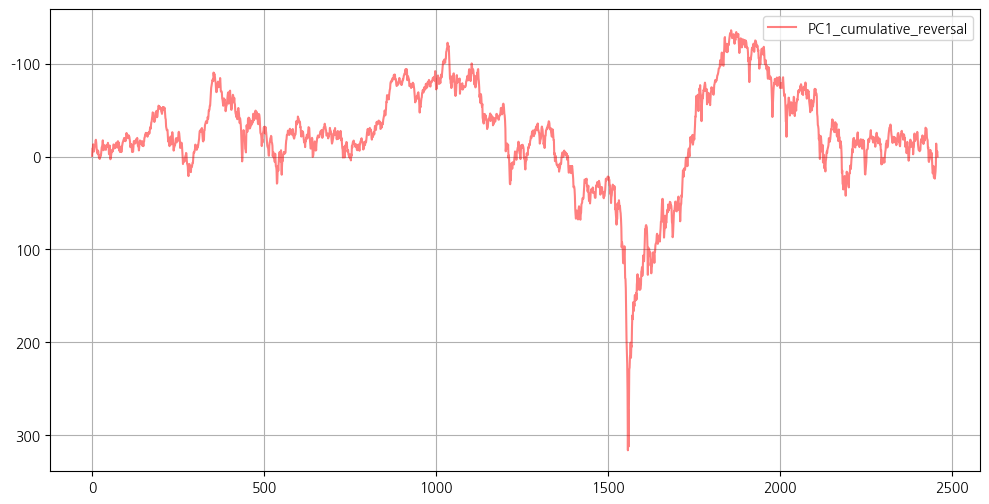

In [12]:
Cumulative_df1 = pca_df['PC1'].cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df1, label='PC1_cumulative_reversal', color='red', alpha=0.5)
plt.legend()
plt.grid(True)

# 현재 y축의 최대 및 최소값을 얻고, 이를 반전시킴
y_min, y_max = plt.gca().get_ylim()
plt.ylim(y_max, y_min)

plt.show()


In [13]:
index_df = pd.read_excel(r'C:\Users\user\Desktop\Factor analysis WS\10년 지수.xlsx', index_col=0)

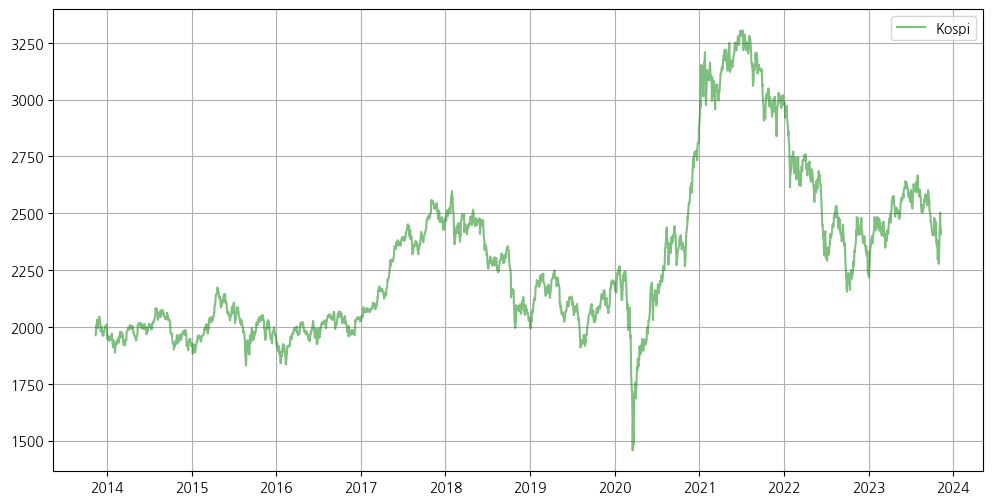

In [14]:
Kospi_df = index_df['코스피']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Kospi_df, label='Kospi', color='green', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

## PC2

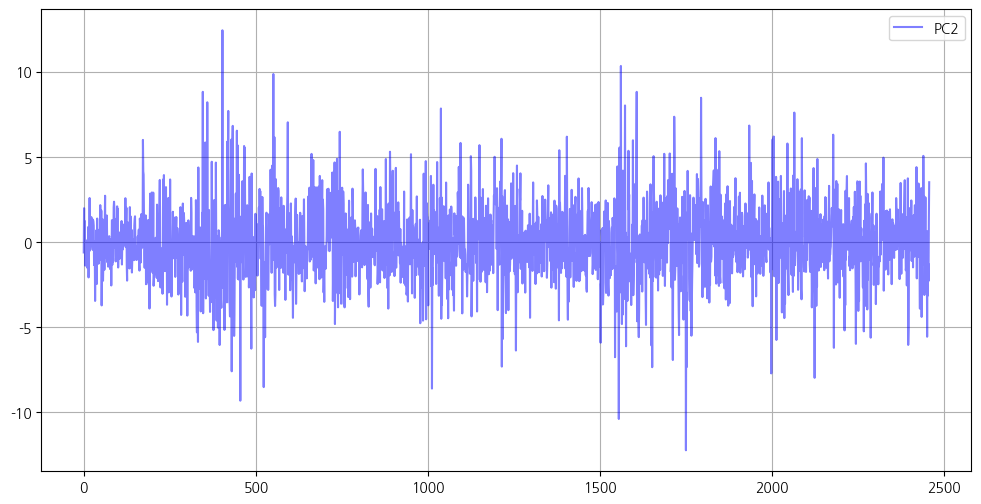

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(pca_df['PC2'], label='PC2', color='blue', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

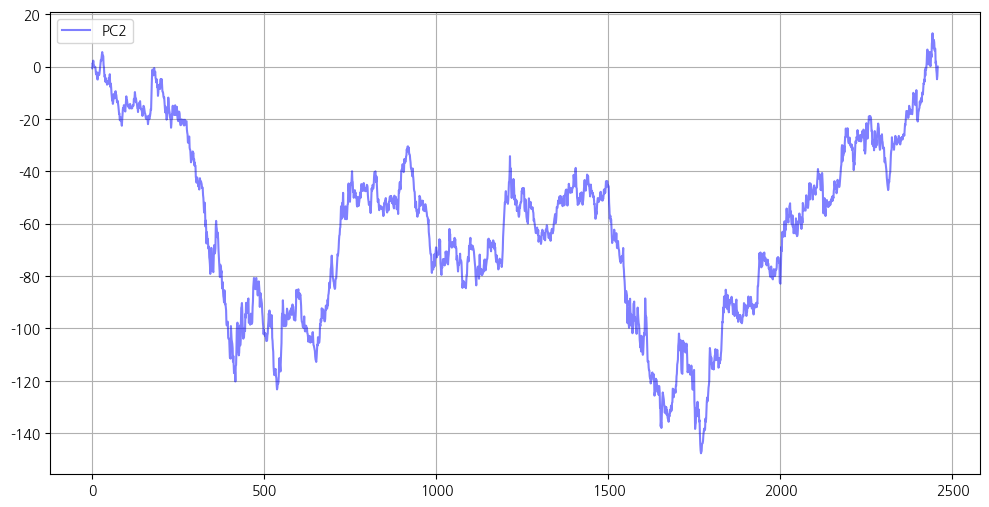

In [16]:
Cumulative_df2 = pca_df['PC2'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df2, label='PC2', color='blue', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

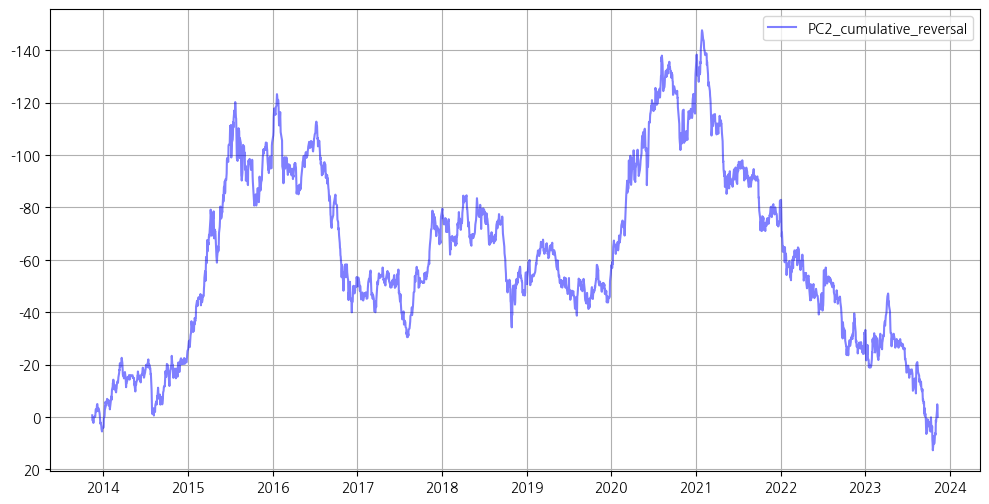

In [72]:
Cumulative_df1 = pca_df['PC2'].cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df1, label='PC2_cumulative_reversal', color='blue', alpha=0.5)
plt.legend()
plt.grid(True)

# 현재 y축의 최대 및 최소값을 얻고, 이를 반전시킴
y_min, y_max = plt.gca().get_ylim()
plt.ylim(y_max, y_min)

plt.show()

## PC3

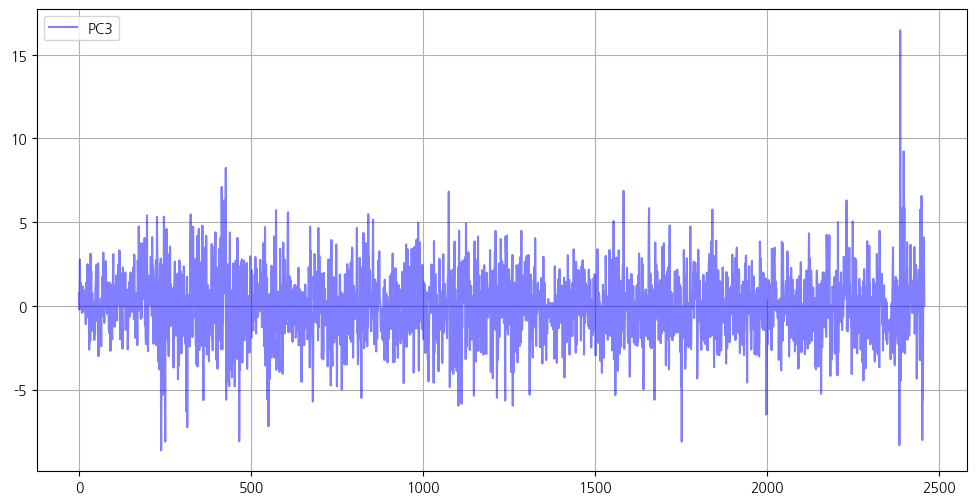

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(pca_df['PC3'], label='PC3', color='blue', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

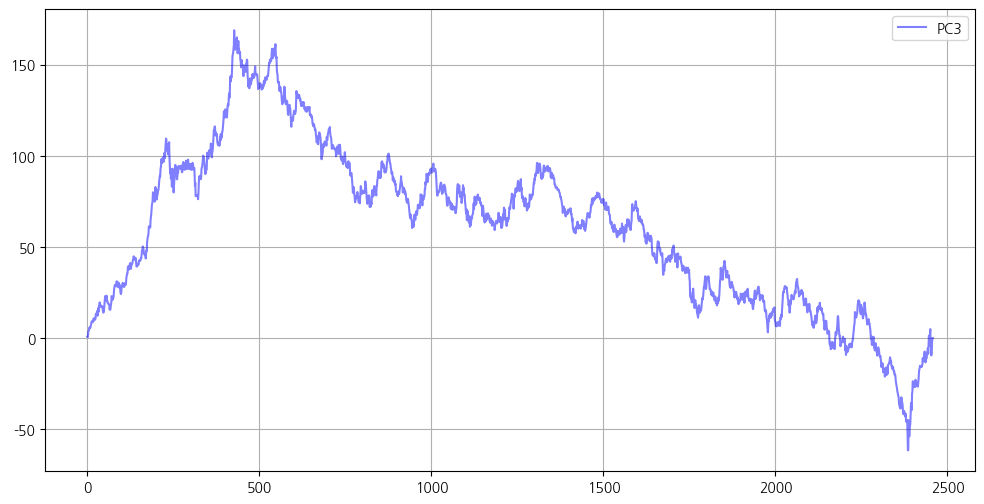

In [18]:
Cumulative_df3 = pca_df['PC3'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df3, label='PC3', color='blue', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

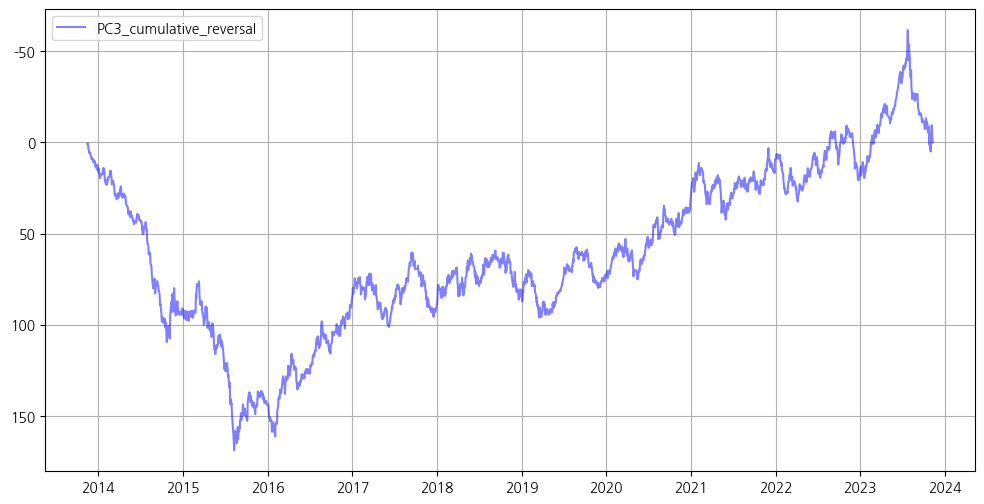

In [73]:
Cumulative_df1 = pca_df['PC3'].cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df1, label='PC3_cumulative_reversal', color='blue', alpha=0.5)
plt.legend()
plt.grid(True)

# 현재 y축의 최대 및 최소값을 얻고, 이를 반전시킴
y_min, y_max = plt.gca().get_ylim()
plt.ylim(y_max, y_min)

plt.show()

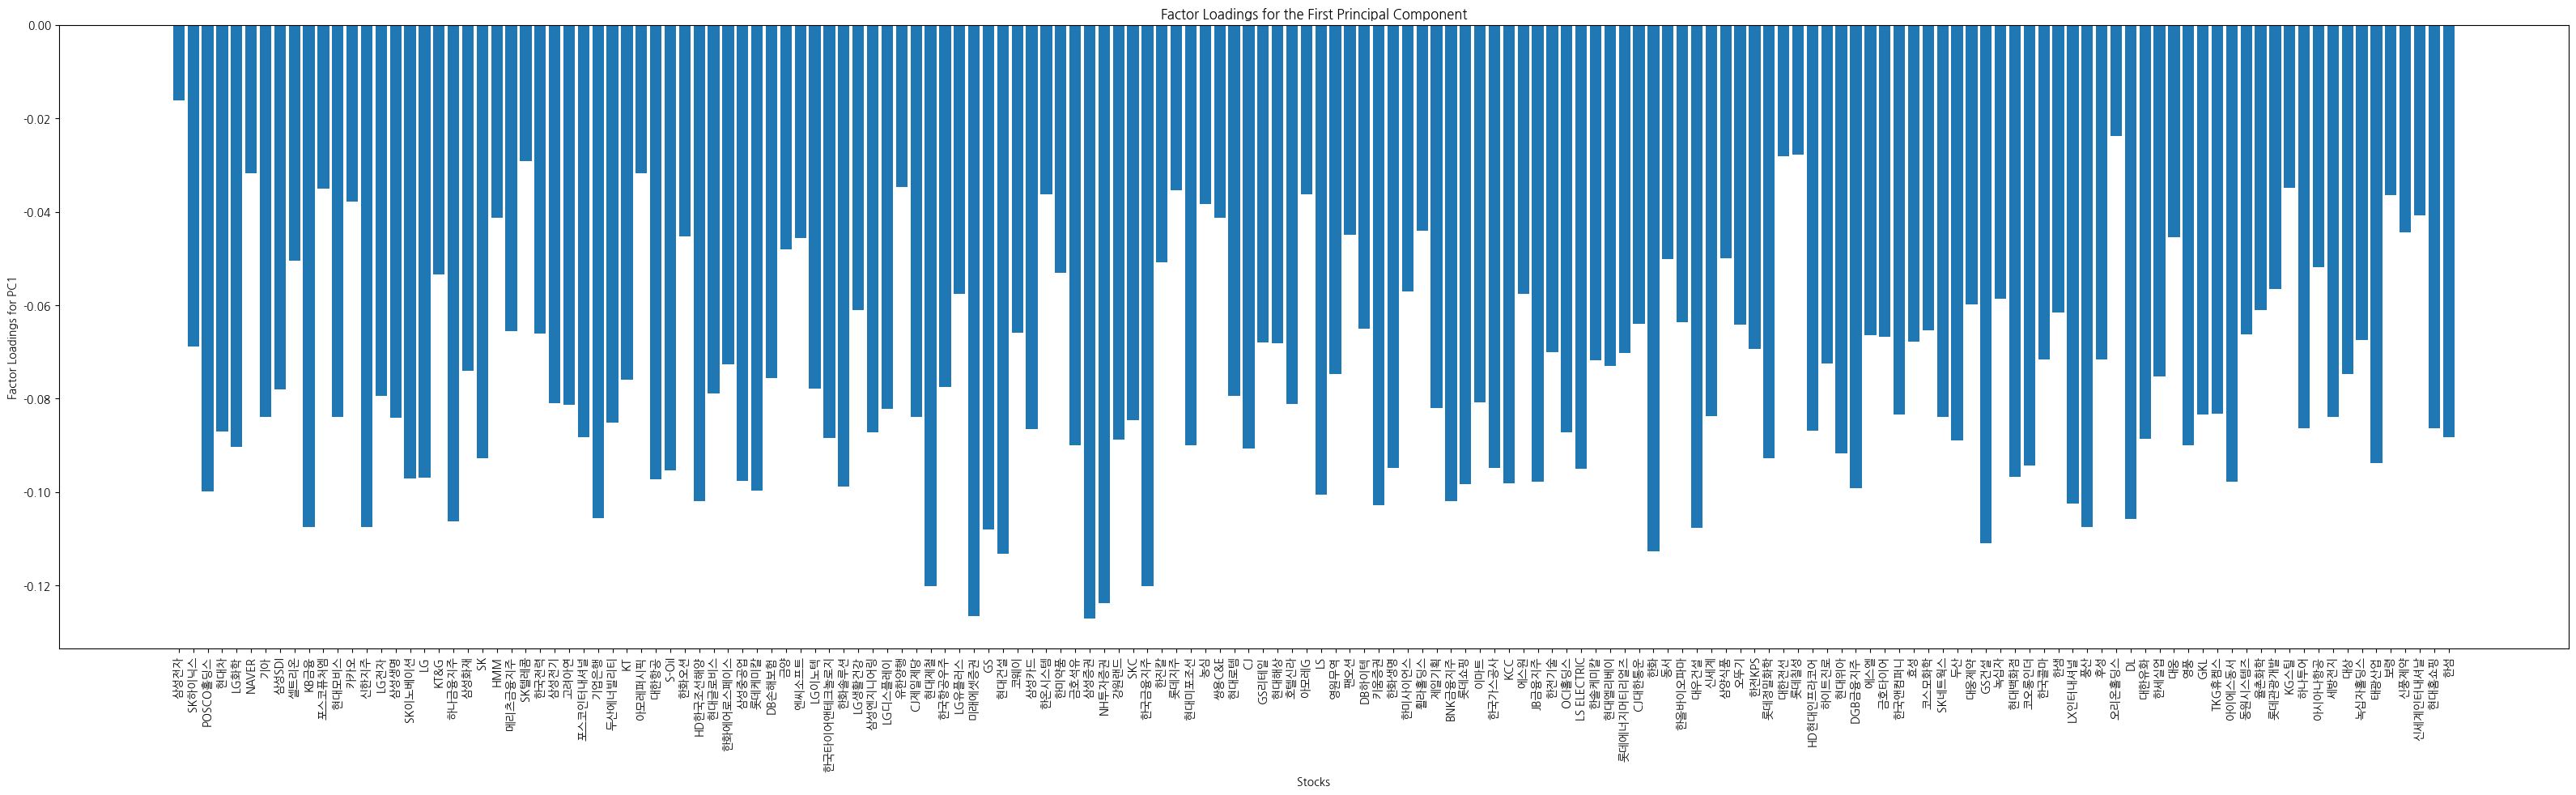

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
pca = PCA(56)
pca.fit(data)

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[0]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
plt.bar(range(len(factor_loadings)), factor_loadings)
plt.xlabel('Stocks')
plt.ylabel('Factor Loadings for PC1')
plt.title('Factor Loadings for the First Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

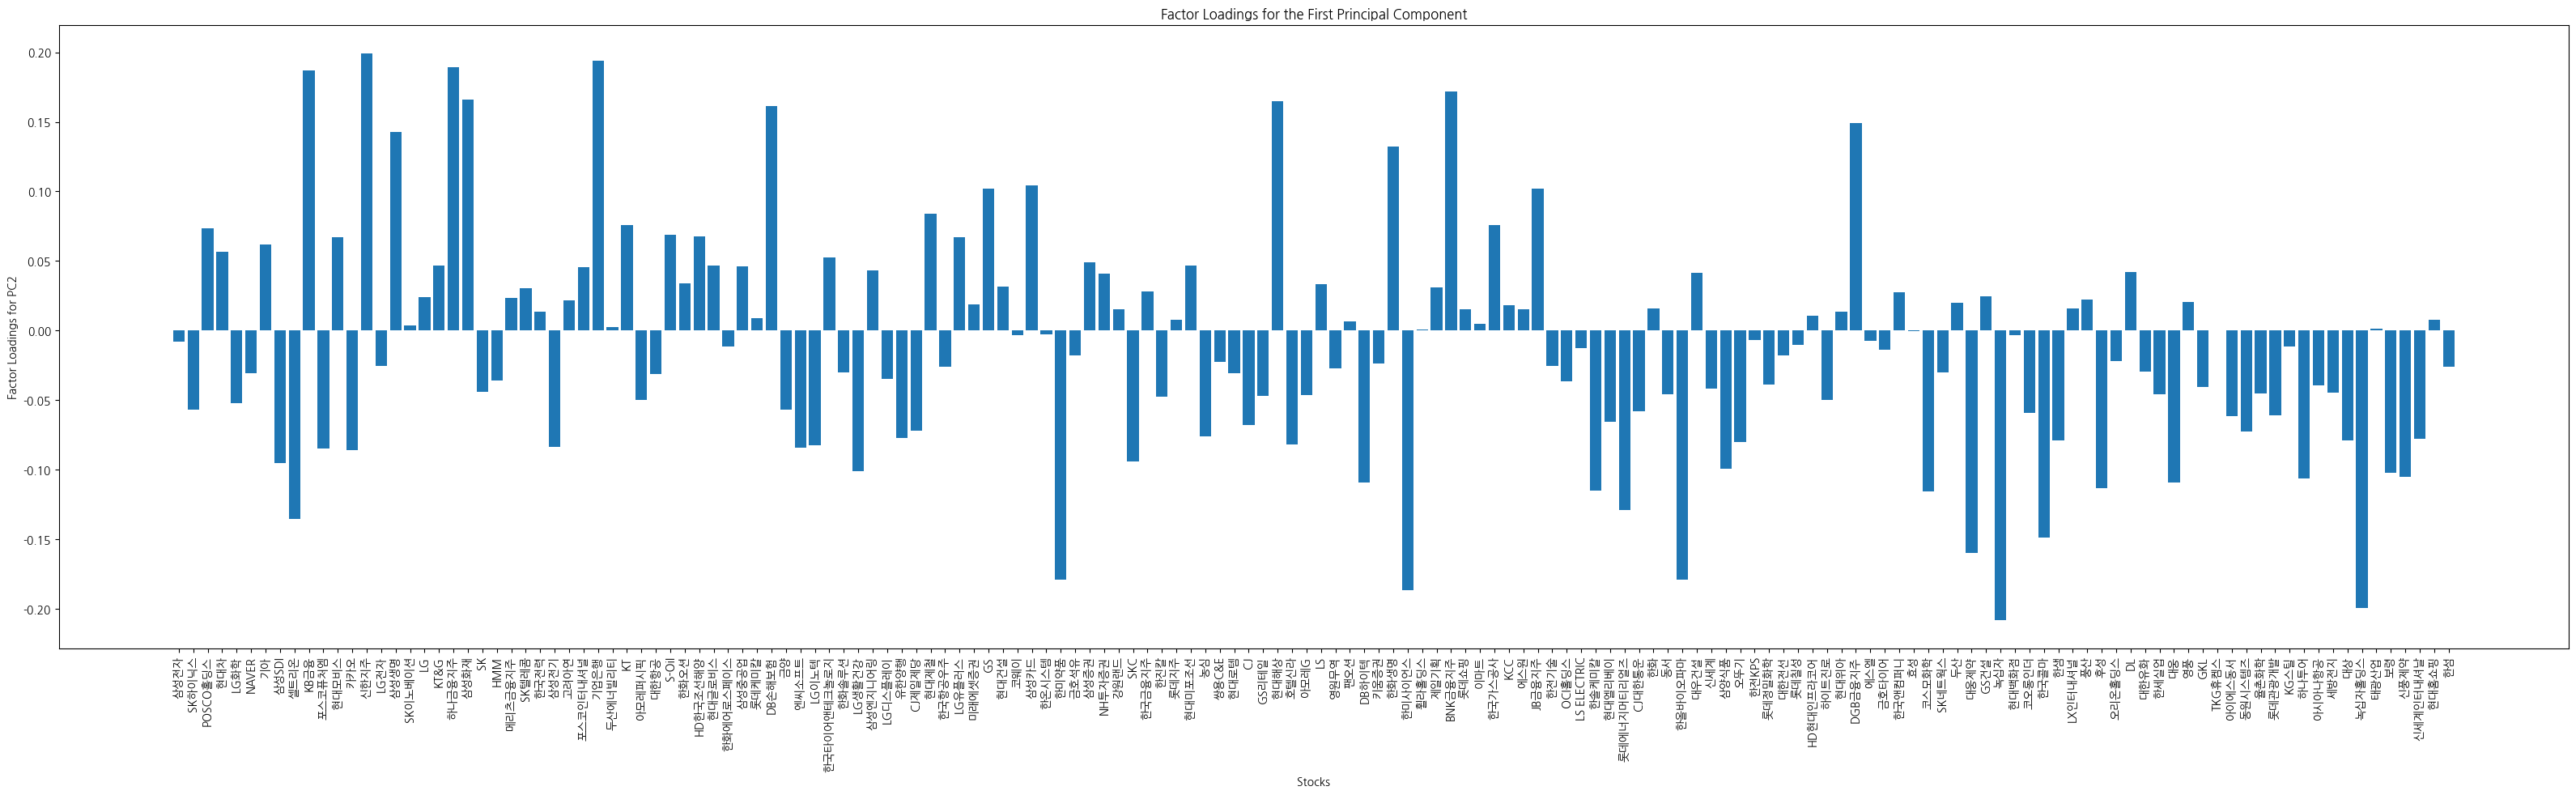

In [20]:
# Get the factor loadings for the first principal component
factor_loadings = pca.components_[1]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
plt.bar(range(len(factor_loadings)), factor_loadings)
plt.xlabel('Stocks')
plt.ylabel('Factor Loadings for PC2')
plt.title('Factor Loadings for the First Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

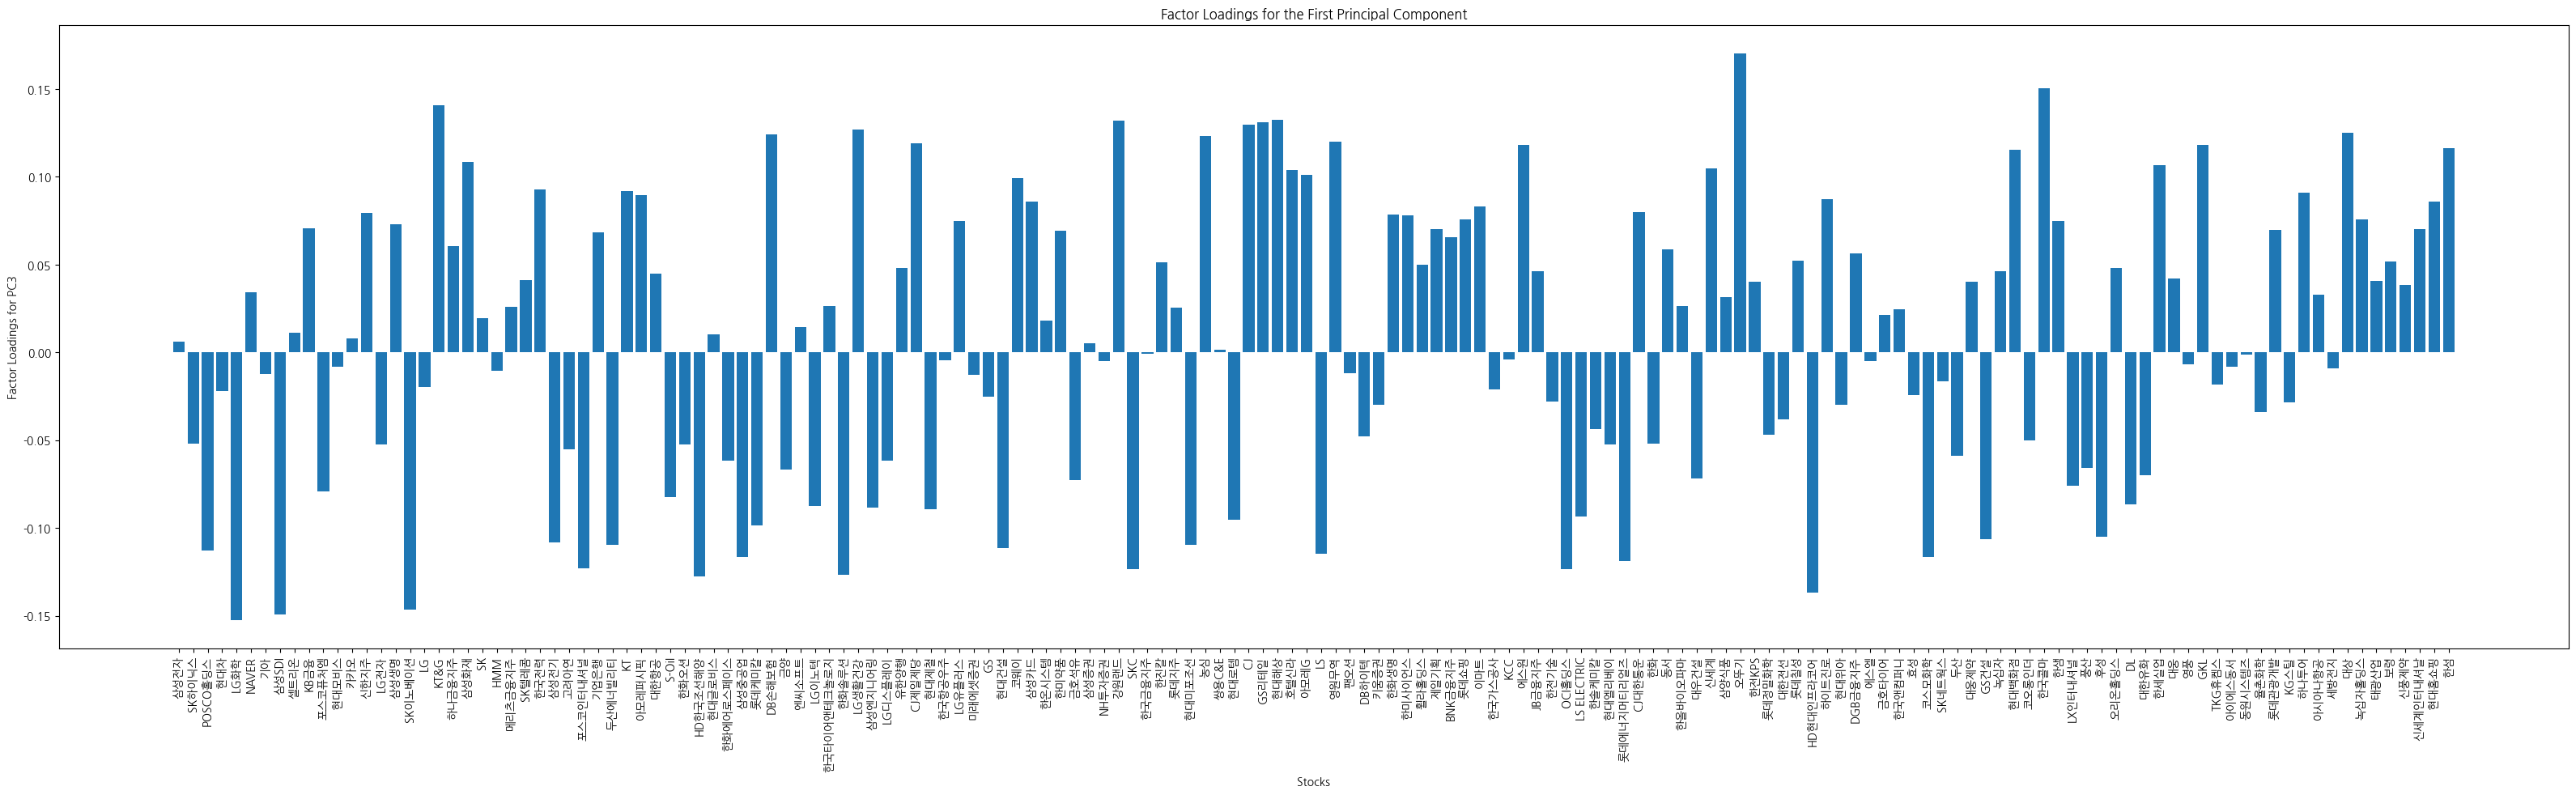

In [21]:
# Get the factor loadings for the first principal component
factor_loadings = pca.components_[2]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
plt.bar(range(len(factor_loadings)), factor_loadings)
plt.xlabel('Stocks')
plt.ylabel('Factor Loadings for PC3')
plt.title('Factor Loadings for the First Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

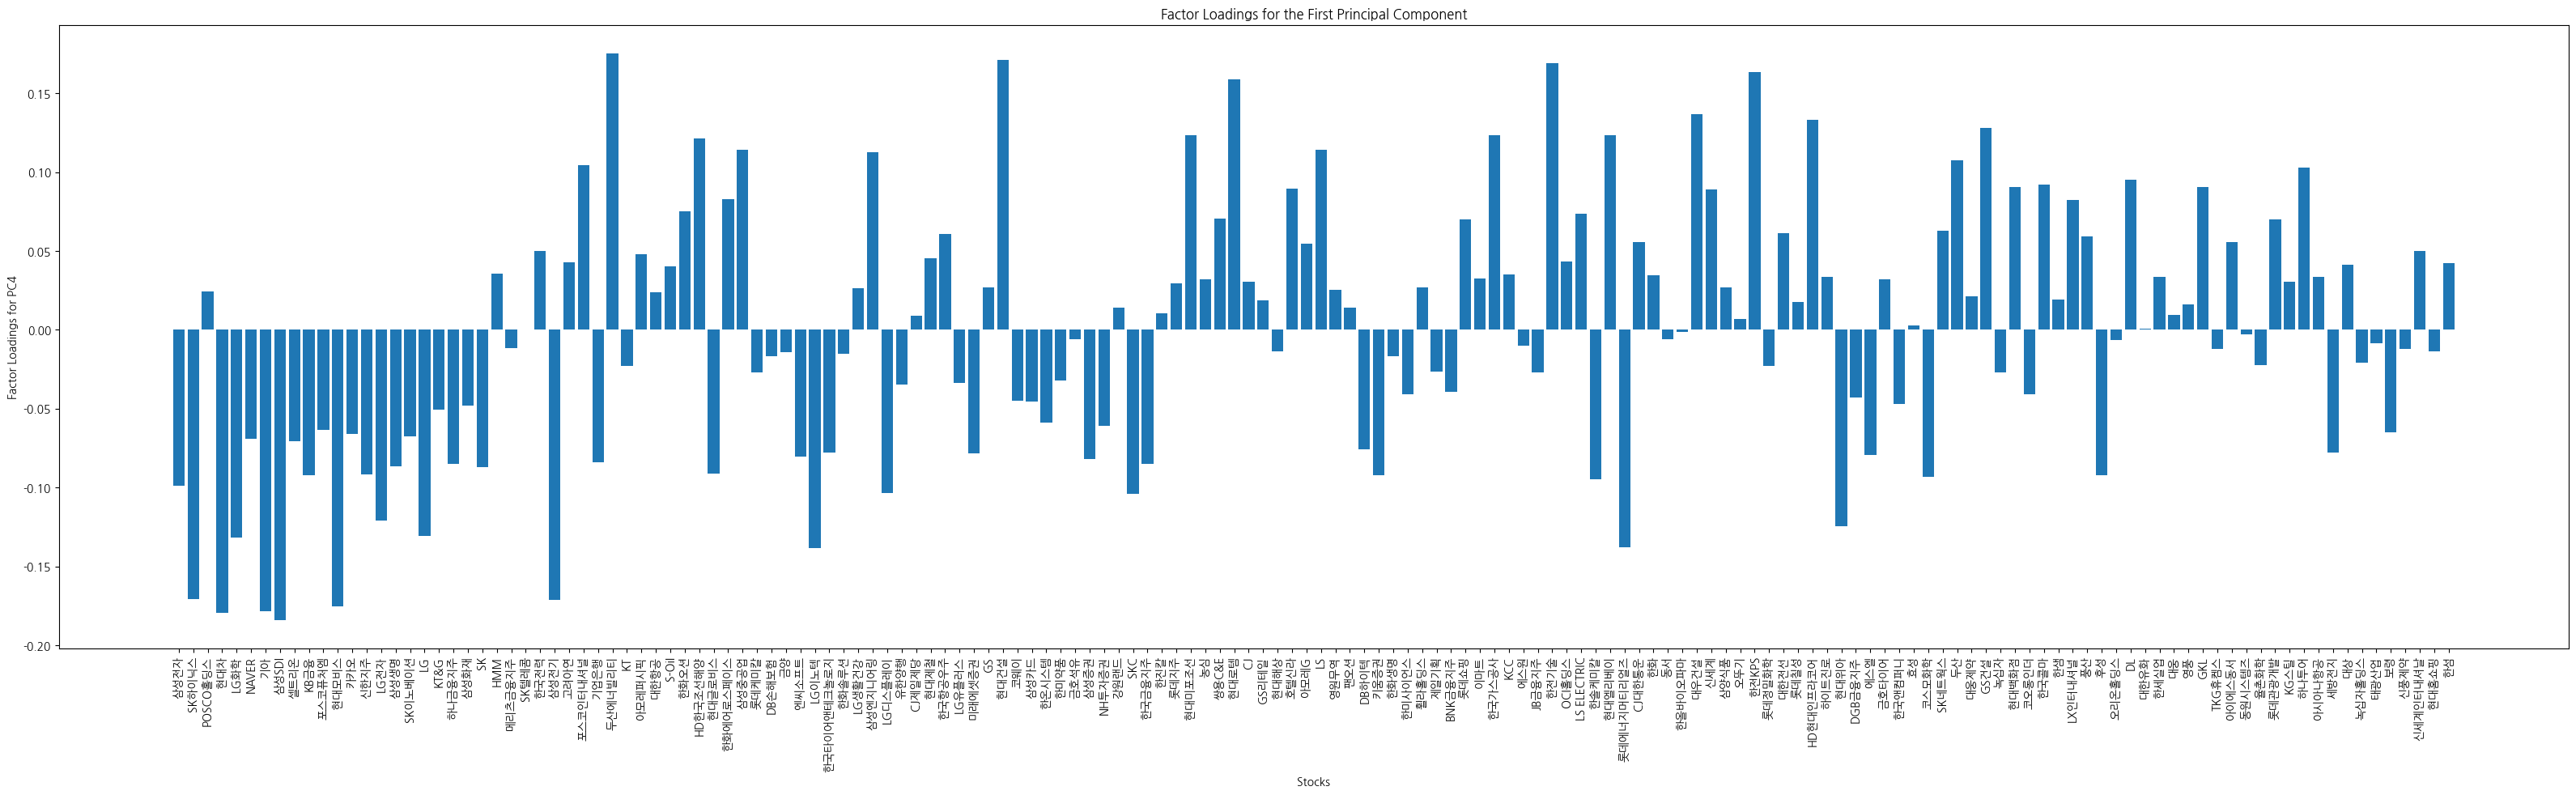

In [22]:
# Get the factor loadings for the first principal component
factor_loadings = pca.components_[3]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
plt.bar(range(len(factor_loadings)), factor_loadings)
plt.xlabel('Stocks')
plt.ylabel('Factor Loadings for PC4')
plt.title('Factor Loadings for the First Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

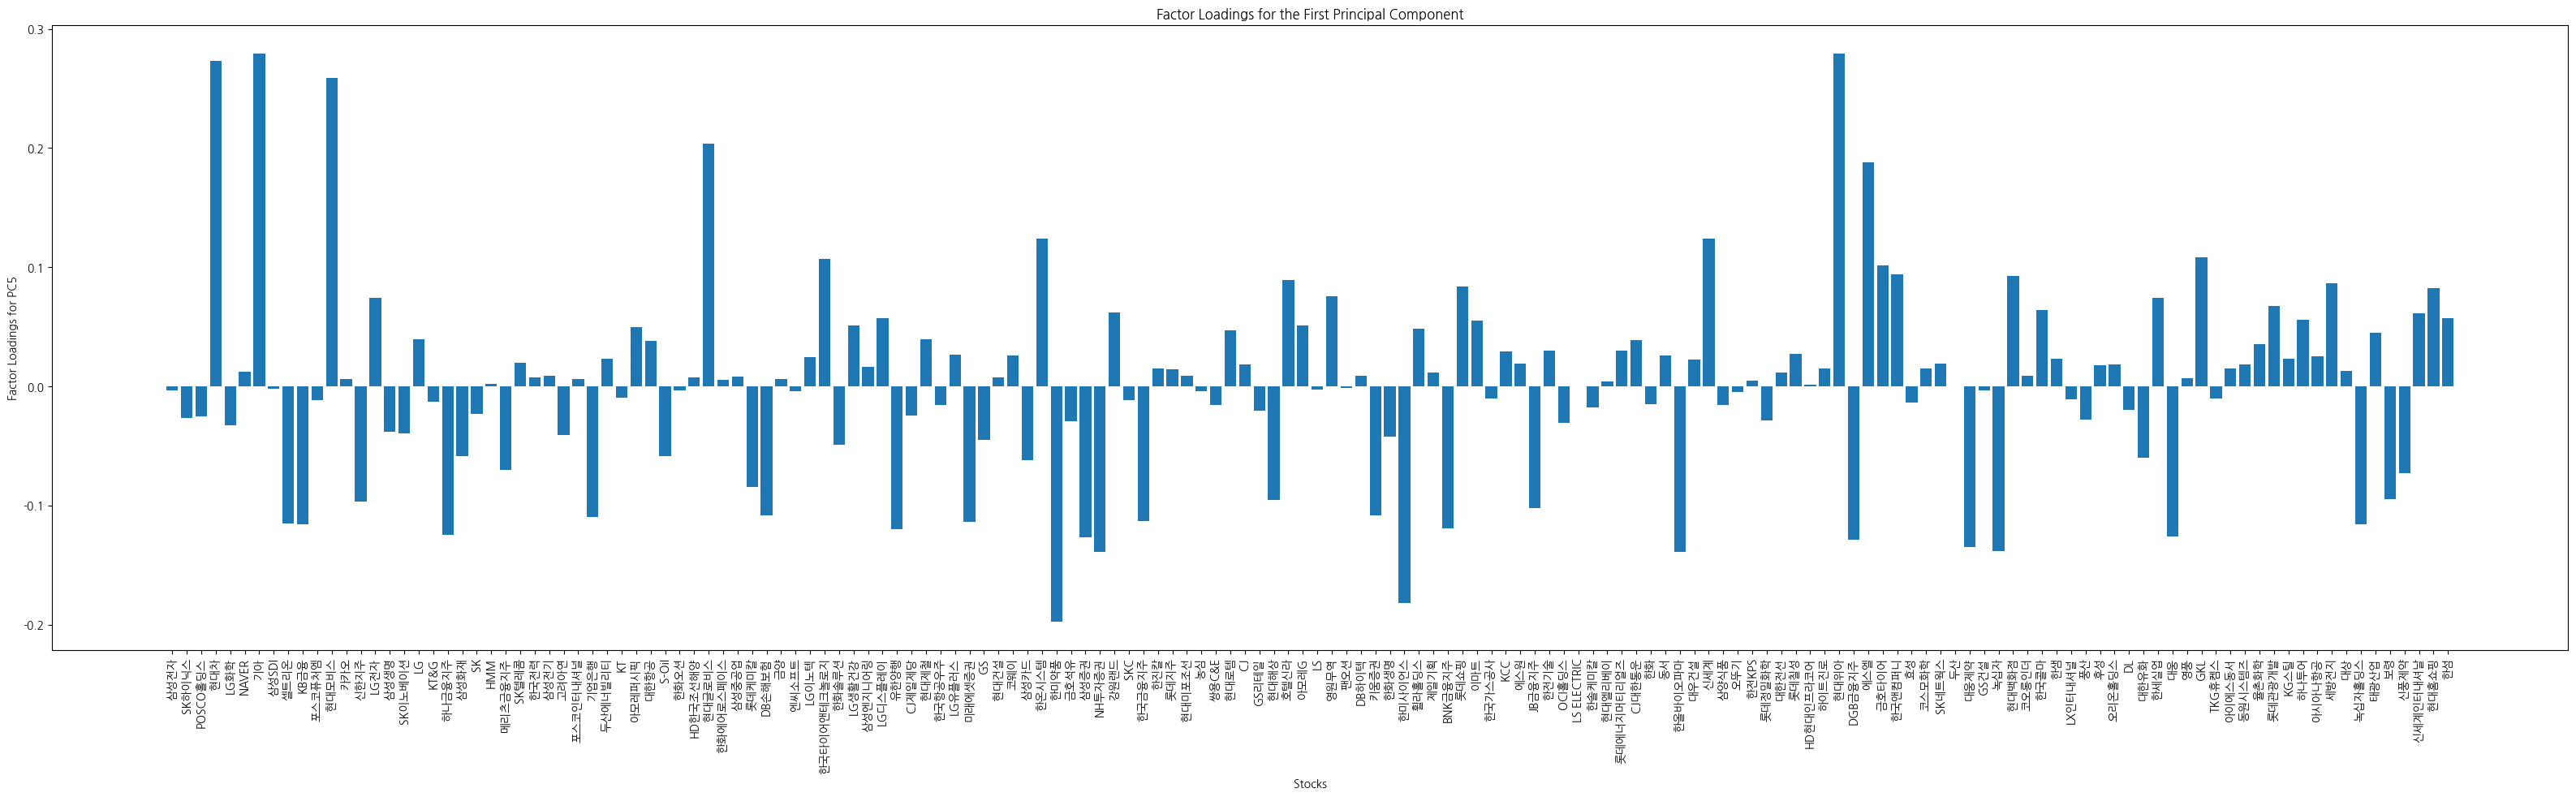

In [23]:
# Get the factor loadings for the first principal component
factor_loadings = pca.components_[4]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
plt.bar(range(len(factor_loadings)), factor_loadings)
plt.xlabel('Stocks')
plt.ylabel('Factor Loadings for PC5')
plt.title('Factor Loadings for the First Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

## 상관관계

In [41]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85
Symbol Name,,,,,,,,,,,,,,,,,,,,,
2013-11-14,-0.755037,-0.612376,0.779629,0.013458,1.806268,-0.370059,1.627625,-0.278278,1.485722,-1.823469,...,-0.249961,0.139740,0.262932,1.006000,0.702294,0.368716,0.781823,-0.262041,-1.950420,-0.334419
2013-11-15,-7.769448,1.983395,-0.203891,-1.049656,-0.682522,0.769296,0.002452,-1.370167,0.093019,-0.810982,...,0.008057,-0.775755,-0.732085,-1.040467,0.446560,-0.224218,-0.064826,-0.448120,1.114683,0.523074
2013-11-18,-0.015218,-0.315036,0.030766,-0.291221,0.067526,0.509020,-0.287598,-0.382450,-1.440578,2.025874,...,0.424007,-0.513974,0.686496,0.464797,1.388599,-1.287652,0.301503,-0.381873,1.847391,-0.166800
2013-11-19,-4.631947,1.229445,2.762950,0.549311,0.987967,1.452592,0.075784,-1.051738,-0.381920,-0.623366,...,-0.447551,-0.582045,0.810530,-0.415748,-1.548676,0.608361,-0.457718,1.045436,0.356460,0.545040
2013-11-20,2.168256,-1.387987,0.582245,0.455854,-1.209138,-1.056710,1.162044,0.117290,0.315406,-0.374968,...,-1.642551,0.295225,-0.345507,0.064452,-0.022929,0.164337,-0.323616,0.974231,-1.897210,0.729177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,-23.182368,-3.145003,-5.620495,-2.655309,-0.551244,-0.609582,0.129813,-0.669975,1.364205,-4.697481,...,-1.328962,-1.765845,-0.554600,0.798386,1.850526,-0.867986,1.293177,0.198810,-0.328485,-2.402201
2023-11-07,8.701940,-1.257330,2.939305,2.816003,-0.037090,0.259768,-1.943986,0.275530,-0.717229,2.880052,...,0.803756,-0.002901,0.700491,0.274029,-1.422796,0.640867,-0.969054,0.971498,0.770043,2.563188
2023-11-08,1.840679,-2.291443,4.092498,1.798446,0.195165,0.195660,-0.421418,0.900747,-0.616422,1.985880,...,-0.174323,-0.833940,0.805654,1.092107,-1.473703,-0.362051,-0.480913,-0.764526,0.545376,0.760019


In [42]:
pca_demo = pca_df

In [59]:
index_data = pd.read_excel(r'C:\Users\user\Desktop\Factor analysis WS\한국 지수.xlsx', index_col=0)
index_data_re = index_data.dropna(axis=0)

In [60]:
pca_demo.index = df.index[1:]


common_index_data_re = index_data_re[index_data_re.index.isin(pca_demo.index)]
common_pca_demo = pca_demo[pca_demo.index.isin(index_data_re.index)]

In [71]:
common_index_data_re

,MKF2000,에너지,소재,산업재,경기소비재,필수소비재,의료,금융,IT,통신서비스,...,디스플레이 및 관련부품,유선통신,무선통신,전력,가스,코스피,코스피 대형주,코스피 중형주,코스피 소형주,코스피 200
Symbol Name,,,,,,,,,,,,,,,,,,,,,
2013-11-14,1772.33,3326.82,2537.54,2325.87,3765.51,4035.11,3005.83,2743.33,1476.01,238.54,...,88.65,173.43,269.08,867.55,2659.79,1967.56,1951.06,2107.72,1410.42,258.44
2013-11-15,1806.41,3368.78,2585.80,2385.05,3813.92,4058.91,3031.19,2834.25,1506.80,240.44,...,89.57,176.22,271.12,866.21,2656.24,2005.64,1992.85,2129.24,1417.32,264.20
2013-11-18,1809.93,3376.55,2595.23,2372.08,3842.15,4055.55,3036.33,2822.13,1513.67,238.89,...,89.34,175.42,269.35,864.38,2655.65,2010.81,1999.11,2126.94,1417.62,265.03
2013-11-19,1825.47,3401.92,2611.82,2390.70,3906.25,4093.95,3016.97,2864.25,1517.71,236.09,...,88.97,173.20,266.20,919.37,2704.62,2031.64,2021.29,2146.74,1415.34,267.81
2013-11-20,1812.04,3372.22,2606.86,2380.65,3860.94,4095.38,3017.41,2838.77,1503.71,233.34,...,88.84,170.15,263.18,921.51,2793.20,2017.24,2004.52,2146.26,1411.96,265.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,2391.35,2988.26,3966.53,1850.56,2890.30,3998.13,6737.41,2467.14,3297.70,236.49,...,65.16,110.05,268.33,500.71,1376.76,2502.37,2503.16,2687.17,2231.94,334.16
2023-11-07,2345.63,2891.70,3734.42,1818.75,2846.61,3983.52,6666.56,2395.66,3253.75,232.25,...,64.22,109.70,263.49,504.02,1345.91,2443.96,2437.41,2663.75,2216.30,327.29
2023-11-08,2319.26,2844.21,3654.40,1804.42,2847.40,3963.95,6715.39,2377.93,3198.16,231.02,...,63.97,109.53,262.10,516.22,1340.25,2421.62,2410.18,2668.77,2212.06,324.00


In [62]:
first_column_pca_demo = common_pca_demo.iloc[:, 0].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

[('코스피 중형주', -0.7935838317788477),
 ('복합 산업', -0.7826372941650475),
 ('기계', -0.7453562348240765),
 ('경기소비재', -0.744968463372247),
 ('증권', -0.7429645787418725),
 ('증권.1', -0.7429645787418725),
 ('산업재', -0.7284506057698995),
 ('금속 및 광물', -0.724837659198723),
 ('코스피 소형주', -0.7157432377050865),
 ('금융', -0.7133501916476409),
 ('내구 소비재 및 의류', -0.6869721170991225),
 ('미디어', -0.6647621694571209),
 ('미디어.1', -0.6647621694571209),
 ('자본재', -0.6573149261196837),
 ('상업은행', -0.6495445565906158),
 ('내구소비재', -0.6489209524763168),
 ('은행', -0.6458145767074746),
 ('에너지', -0.629978453248931),
 ('에너지.1', -0.629978453248931),
 ('통신서비스', -0.6246444915526492),
 ('통신서비스.1', -0.6246444915526492),
 ('전기장비', -0.6115741225152473),
 ('무선통신', -0.6108793544940267),
 ('코스피', -0.6072809370835579),
 ('디스플레이', -0.6017875745062223),
 ('디스플레이 및 관련부품', -0.6017875745062223),
 ('건설', -0.5964530984787256),
 ('운송', -0.5801932971863029),
 ('자동차 및 부품', -0.576599920666791),
 ('소재', -0.5749268931248505),
 ('소재.1', -0.5749268931248

In [63]:
first_column_pca_demo = common_pca_demo.iloc[:, 1].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

[('제약', -0.8518670981509059),
 ('의료', -0.7422020815391299),
 ('제약 및 바이오', -0.7399023977762292),
 ('일반 소프트웨어', -0.665896482044133),
 ('의료 장비 및 서비스', -0.6493189616709818),
 ('의료장비 및 서비스', -0.6493179028729114),
 ('생활용품', -0.6301784294136851),
 ('통신장비', -0.6234386259159124),
 ('게임 소프트웨어', -0.6186090515629664),
 ('조선', 0.61390537927213),
 ('바이오', -0.6099392215990909),
 ('용기 및 포장', -0.5780976212314785),
 ('가스', 0.5448613611682074),
 ('내구소비재', -0.5226964082266883),
 ('무역', 0.5216743919394253),
 ('필수소비재', -0.5127587678850152),
 ('내구 소비재 및 의류', -0.4884661783973667),
 ('음료', -0.46044017283720484),
 ('개인생활용품', -0.4557452177114001),
 ('은행', 0.45042581506504054),
 ('상업은행', 0.44994851320808255),
 ('자본재', 0.4427515959387304),
 ('소프트웨어', -0.4319425993011202),
 ('기계', 0.4250078840599072),
 ('사무기기', 0.4203595072745671),
 ('금속 및 광물', 0.4194528686811812),
 ('창업투자 및 종금', -0.40390882467962297),
 ('종이 및 목재', -0.3991775216956378),
 ('기타금융', -0.3952268623179049),
 ('코스피 중형주', -0.39381284363600083),
 ('에너지 시설 및

In [64]:
first_column_pca_demo = common_pca_demo.iloc[:, 2].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

# 물가 or 소비

[('음식료 및 담배', 0.8564273421255446),
 ('개인생활용품', 0.8555318767459882),
 ('필수소비재', 0.8467321718847172),
 ('전자 장비 및 기기', -0.8357560643675074),
 ('식료품', 0.8108140031544403),
 ('전력', 0.80088606388995),
 ('생활용품', 0.7715076147346777),
 ('하드웨어', -0.7705994396357968),
 ('유틸리티', 0.7664712189547928),
 ('유틸리티.1', 0.7664712189547928),
 ('호텔 및 레저', 0.7336160824892558),
 ('소재', -0.7223218529184342),
 ('소재.1', -0.7223218529184342),
 ('IT', -0.7178510548585799),
 ('소비자 서비스', 0.7140543347798117),
 ('보안장비', 0.7067898102537877),
 ('가정생활용품', 0.7058711850838687),
 ('화학', -0.7043101087855351),
 ('담배', 0.6984355052936315),
 ('휴대폰 및 관련부품', -0.686404582812883),
 ('도소매', 0.6734764508052277),
 ('반도체', -0.6693502802308365),
 ('반도체 및 관련장비', -0.6693502802308365),
 ('레저용품', 0.6465509724064324),
 ('셋톱 박스', 0.6435301044589895),
 ('자동차', -0.6342538741999392),
 ('코스피 대형주', -0.6274119587569699),
 ('유통', 0.6215062438388536),
 ('코스피 200', -0.6176051389253),
 ('컴퓨터 및 주변기기', -0.610753980479781),
 ('IT 서비스', 0.5976407667367599),

In [65]:
first_column_pca_demo = common_pca_demo.iloc[:, 3].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

# IT

[('일반 소프트웨어', -0.8161068618256666),
 ('휴대폰 및 관련부품', -0.8099628553024548),
 ('게임 소프트웨어', -0.7962042557288631),
 ('IT', -0.7885642746425792),
 ('통신장비', -0.787922675903167),
 ('반도체', -0.7779597331743532),
 ('반도체 및 관련장비', -0.7779597331743532),
 ('코스피 200', -0.7681996991724355),
 ('MKF2000', -0.7558503659818678),
 ('코스피 대형주', -0.7555833232168686),
 ('바이오', -0.7519180797047328),
 ('소프트웨어', -0.7460989959296606),
 ('하드웨어', -0.7356682784009838),
 ('코스피', -0.7307056017409057),
 ('의료', -0.7258810534554433),
 ('인터넷 서비스', -0.7206154429335537),
 ('제약 및 바이오', -0.7169296121966847),
 ('화학', -0.7105010855207579),
 ('내구소비재', -0.6382180137923784),
 ('유틸리티', 0.6331667846001828),
 ('유틸리티.1', 0.6331667846001828),
 ('창업투자 및 종금', -0.6125703044510659),
 ('사무기기', 0.6072202022776656),
 ('전자 장비 및 기기', -0.6067106472890076),
 ('전력', 0.6063715594283399),
 ('소재', -0.5939388177590369),
 ('소재.1', -0.5939388177590369),
 ('셋톱 박스', 0.5547767247662571),
 ('제약', -0.5522558841750113),
 ('건축자재', 0.5492955800928886),
 ('의료 장비 및

In [66]:
first_column_pca_demo = common_pca_demo.iloc[:, 4].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

# 금리 + 물가


[('가정생활용품', -0.8524300914322526),
 ('자동차', 0.8175182885169999),
 ('상호저축은행', -0.7113040261921206),
 ('생활용품', -0.7005060890701059),
 ('자동차 및 부품', 0.6861193678500489),
 ('담배', -0.6803558904511217),
 ('해상운수', 0.6692383133836134),
 ('필수소비재', -0.6670040128707232),
 ('개인생활용품', -0.6066473258606699),
 ('도소매', -0.5641877807136455),
 ('음식료 및 담배', -0.5552952276920001),
 ('운송', 0.5452357329076727),
 ('전자 장비 및 기기', 0.5410217934014382),
 ('제약', -0.4795925352575195),
 ('항공운수', 0.4743322926123789),
 ('소비자 금융', -0.4729851386933552),
 ('인터넷 서비스', 0.44634341152943635),
 ('식료품', -0.43673248697239847),
 ('소재', 0.42427957125078164),
 ('소재.1', 0.42427957125078164),
 ('경기소비재', 0.4043319059182958),
 ('화학', 0.40318920749859166),
 ('무역', 0.4020540695328252),
 ('산업재', 0.39907102677335005),
 ('금융', -0.38315439071711227),
 ('조선', 0.3743665919265426),
 ('유통', -0.37231215563940484),
 ('소프트웨어', 0.37160344527471795),
 ('하드웨어', 0.36764528210541847),
 ('보험', -0.3604428303934578),
 ('보험.1', -0.3604428303934578),
 ('보안장비', 

In [67]:
first_column_pca_demo = common_pca_demo.iloc[:, 5].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

# 상업서비스

[('상업서비스', 0.8200022566034441),
 ('상업서비스.1', 0.8200022566034441),
 ('전력', 0.6203410897359424),
 ('유틸리티', 0.6106233504164542),
 ('유틸리티.1', 0.6106233504164542),
 ('셋톱 박스', 0.6048517591073361),
 ('게임 소프트웨어', -0.5949332302528935),
 ('통신장비', -0.5796939266053208),
 ('무역', 0.5667171505073652),
 ('보험', 0.5666584591057299),
 ('보험.1', 0.5666584591057299),
 ('유선통신', 0.5515823119702071),
 ('반도체', -0.5226303289215456),
 ('반도체 및 관련장비', -0.5226303289215456),
 ('바이오', -0.499749439089855),
 ('음식료 및 담배', 0.49668717295015213),
 ('전기장비', 0.48682883156501),
 ('레저용품', 0.48271440457107806),
 ('식료품', 0.4763707872595548),
 ('담배', 0.47593517939736224),
 ('휴대폰 및 관련부품', -0.4634549744384064),
 ('항공운수', -0.4629247800971192),
 ('일반 소프트웨어', -0.44318524480138544),
 ('건축자재', 0.43131542435281395),
 ('IT', -0.42965097801012647),
 ('소프트웨어', -0.41664267440931635),
 ('육상운수', 0.4083373253445997),
 ('자동차부품', 0.3940844771970449),
 ('기타금융', -0.3884782658596215),
 ('부동산', 0.38812501903576635),
 ('부동산.1', 0.38812501903576635),
 (